# Startup funding analysis

For this project I will be working with a datasets containing information on Indian startups' funding, including the startup's details, the funding it received, and the investors' information. 

At [this link](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data?select=startup_funding2019.csv) you can find the source of the original data (Kaggle) as well as more information on its composition *(note: the files in the data folder are slightly different from the originals)*.

1. Using a **for loop**, loaded all three .csv files in a temporary DataFrame called `df_tmp` and, at each cycle, added a new column named `Year` that includes the year of that csv file to the temporary table and appended it to a final DataFrame named `fnd`. My final `fnd` DataFrame includes the contents from all three csv files stacked one on top of the other. 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup as soup

from IPython.display import IFrame

In [2]:
file_list = ['startup_funding2019.csv', 'startup_funding2020.csv', 'startup_funding2021.csv']

In [3]:
temp_df = pd.DataFrame()

In [4]:
fnd = pd.DataFrame()

In [5]:
for file in file_list:
    temp_df = pd.read_csv("data/"+file)
    temp_df['Year'] = file[15:19]
    fnd = pd.concat([fnd, temp_df])

In [6]:
fnd.shape

(2343, 10)

2. Checking the columns' data types, I noticed that the columns `Founded`, `Amount($)` and `Year` are being interpreted as strings instead of numbers. Formatted those three columns to numeric data types. 

In [7]:
fnd.dtypes

Company/Brand    object
Founded          object
HeadQuarter      object
Sector           object
What it does     object
Founders         object
Investor         object
Amount($)        object
Stage            object
Year             object
dtype: object

In [8]:
fnd['Founded'] = fnd['Founded'].fillna(0)
fnd['Founded'] = fnd['Founded'].replace('-', '0')

In [9]:
fnd['Founded'] = fnd['Founded'].astype(int)

In [10]:
fnd['Amount($)'] = fnd['Amount($)'].str.replace('Undisclosed', '0')
fnd['Amount($)'] = fnd['Amount($)'].str.replace('$', '')
fnd['Amount($)'] = fnd['Amount($)'].str.replace(',', '')
fnd['Amount($)'] = fnd['Amount($)'].str.replace('.', '')
fnd['Amount($)'] = fnd['Amount($)'].fillna(0)

C:\Users\flbon\AppData\Local\Temp\ipykernel_16424\3555305718.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fnd['Amount($)'] = fnd['Amount($)'].str.replace('$', '')
C:\Users\flbon\AppData\Local\Temp\ipykernel_16424\3555305718.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fnd['Amount($)'] = fnd['Amount($)'].str.replace('.', '')


In [11]:
fnd['Amount($)'] = fnd['Amount($)'].astype(str)
fnd['Amount($)'] = fnd['Amount($)'].astype('Int64')

In [12]:
fnd['Year'] = fnd['Year'].astype(int)

In [13]:
# Note: Ahmadabad and Ahmedabad look like different spelling of the same city.

fnd = fnd.replace('Ahmadabad', 'Ahmedabad')

In [14]:
fnd.groupby('Year')['Amount($)'].sum()

Year
2019      3336433200
2020     90872786604
2021    177349237000
Name: Amount($), dtype: Int64

Wondered what is the **total** `Amount($)` of funding given in the three years available.

In [15]:
fnd['Amount($)'].sum()

271558456804

3. The following code shows us that "Inflection Point Ventures" was the `Investor` that funded the highest number of `Company/Brand`s overall (36 companies funded from 2019 to 2021). 

    I then investigate how did "Inflection Point Ventures" **rank** *(in terms of most `Company/Brand`s funded) **in 2020**. (In the answer is written the rank number, where 1 = most funded company)*

In [16]:
fnd.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(1)

,Investor,size
696,Inflection Point Ventures,36


In [17]:
n_companies_funded_2020 = fnd[fnd['Year'] == 2020].groupby('Investor', as_index=False)['Company/Brand'].size().sort_values('size', ascending=False)

In [18]:
n_companies_funded_2020

,Investor,size
789,Venture Catalysts,20
484,Mumbai Angels Network,12
85,Angel investors,12
334,Inflection Point Ventures,11
769,Undisclosed,10
...,...,...
298,Homage Ventures.,1
299,HostelFund,1
300,Huddle Accelerator,1
301,"Hummingbird Ventures, Bedrock Capital",1


In [19]:
n_companies_funded_2020 = n_companies_funded_2020.reset_index(drop=True)

In [20]:
n_companies_funded_2020 = n_companies_funded_2020.rename(index = lambda x: x + 1)

In [21]:
n_companies_funded_2020

,Investor,size
1,Venture Catalysts,20
2,Mumbai Angels Network,12
3,Angel investors,12
4,Inflection Point Ventures,11
5,Undisclosed,10
...,...,...
844,Homage Ventures.,1
845,HostelFund,1
846,Huddle Accelerator,1
847,"Hummingbird Ventures, Bedrock Capital",1


In [22]:
n_companies_funded_2020.loc[n_companies_funded_2020['Investor'] == 'Inflection Point Ventures'].index[0]

4

4. Loaded the `Software Professionals Salary.csv` file in a DataFrame named `sps`, then performed the following tasks: 
    1. starting from the `sps` DataFrame, created a new DF called `sps_loc` where I grouped by `Location` and showed, for each city in the dataset, the average `Rating` and `Salary`;
    2. starting from the `fnd` DataFrame, created a new DF called `fnd_loc` where I grouped by `HeadQuarter` and showed, for each city in the dataset **for the year 2021**, the total number of `Company/Brand`s funded and the total `Amount($)` invested;
    3. merged the two DataFrames I just created so to **keep just the cities that are in both datasets** and saved the results in a third DataFrame called `sps_fnd_loc`;
    4. using the `sps_fnd_loc` DataFrame: 
        1. deleted the `HeadQuarter` column
        2. created a new column `Amount($MM)` that is equal to `Amount($)` divided by 1,000,000
        3. deleted the `Amount($)` column
        4. renamed all the columns to the following names: `['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']`

In [23]:
sps = pd.read_csv('data/Software Professionals Salary.csv')

In [24]:
sps_loc = sps.groupby('Location', as_index=False)[['Rating', 'Salary']].mean()

In [25]:
sps_loc

,Location,Rating,Salary
0,Bangalore,3.920232,735344.739593
1,Chennai,3.902726,584559.661513
2,Hyderabad,3.914484,679099.157376
3,Jaipur,3.940741,629135.802469
4,Kerala,3.885185,553577.481481
5,Kolkata,4.024719,710925.573034
6,Madhya Pradesh,3.992258,677641.909677
7,Mumbai,3.881709,961180.368491
8,New Delhi,3.943415,658756.735632
9,Pune,3.886082,690476.311153


In [26]:
fnd

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,Bombay Shaving,0,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000,NaN,2019
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000,Series C,2019
2,Eduisfun,0,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000,Fresh funding,2019
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000,Series D,2019
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000,NaN,2019
...,...,...,...,...,...,...,...,...,...,...
1197,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000,Pre-series A,2021
1198,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000,Series D,2021
1199,Leap Finance,2019,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000,Series C,2021
1200,CollegeDekho,2015,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000,Series B,2021


In [27]:
fnd_loc = fnd[fnd['Year'] == 2021].groupby('HeadQuarter', as_index=False).agg({'Company/Brand':'count', 'Amount($)': 'sum'})

In [28]:
fnd_loc.head(10)


,HeadQuarter,Company/Brand,Amount($)
0,Ahmedabad,17,202455000
1,Ambernath,1,0
2,Andheri,1,0
3,Bangalore,425,14327420000
4,Beijing,1,200000000
5,Bhilwara,1,8000000
6,Bhubaneswar,1,30000000
7,Chandigarh,5,24100000
8,Chennai,40,717140000
9,Cochin,2,400000


In [29]:
sps_fnd_loc = sps_loc.merge(fnd_loc, how='inner', left_on='Location', right_on='HeadQuarter')

In [30]:
sps_fnd_loc.head(10)

,Location,Rating,Salary,HeadQuarter,Company/Brand,Amount($)
0,Bangalore,3.920232,735344.739593,Bangalore,425,14327420000
1,Chennai,3.902726,584559.661513,Chennai,40,717140000
2,Hyderabad,3.914484,679099.157376,Hyderabad,34,243960000
3,Jaipur,3.940741,629135.802469,Jaipur,11,343300000
4,Kolkata,4.024719,710925.573034,Kolkata,5,28000000
5,Mumbai,3.881709,961180.368491,Mumbai,200,153830300000
6,New Delhi,3.943415,658756.735632,New Delhi,143,1673010000
7,Pune,3.886082,690476.311153,Pune,46,509070000


In [31]:
sps_fnd_loc = sps_fnd_loc.drop(columns='HeadQuarter')

In [32]:
sps_fnd_loc['Amount($MM)'] = sps_fnd_loc['Amount($)']/1000000

In [33]:
sps_fnd_loc = sps_fnd_loc.drop(columns='Amount($)')

In [34]:
sps_fnd_loc.columns = ['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']

In [35]:
sps_fnd_loc

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,Bangalore,3.920232,735344.739593,425,14327.42
1,Chennai,3.902726,584559.661513,40,717.14
2,Hyderabad,3.914484,679099.157376,34,243.96
3,Jaipur,3.940741,629135.802469,11,343.3
4,Kolkata,4.024719,710925.573034,5,28.0
5,Mumbai,3.881709,961180.368491,200,153830.3
6,New Delhi,3.943415,658756.735632,143,1673.01
7,Pune,3.886082,690476.311153,46,509.07


Looking at the `City` that received the **highest** `Avg. Rating` score by employees, wondered what is the `Nr. Companies Funded` in that city.

In [36]:
sps_fnd_loc.sort_values('Avg. Rating', ascending=False).head(1)

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
4,Kolkata,4.024719,710925.573034,5,28.0


Only 5 companies were funded in Kolkata, which is not a good sample size to conclude Kolkata is actually the best city for start-up employees.

In [37]:
sps_fnd_loc.sort_values('Avg. Rating', ascending=False).head(2)

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
4,Kolkata,4.024719,710925.573034,5,28.0
6,New Delhi,3.943415,658756.735632,143,1673.01


New Delhi is most likely the best city for start-up employees.

5. Created a scatterplot that shows the relationship between the `Avg. Salary` and the `Sum Funding ($MM)`. A `City` stands out in terms of total funding received by companies and salary paid to their employees: Mumbai.

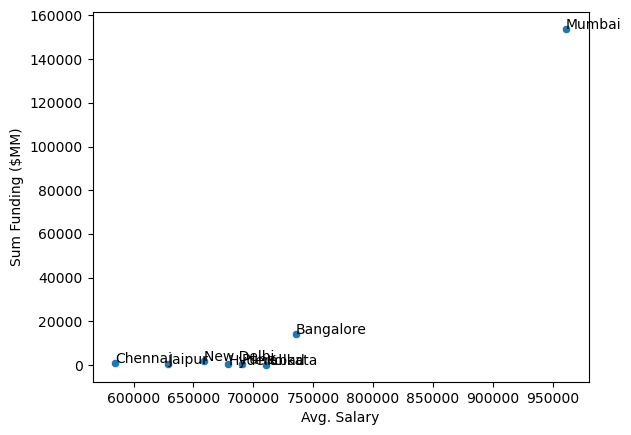

In [38]:
city = sps_fnd_loc['City']
salary = sps_fnd_loc['Avg. Salary']
funding = sps_fnd_loc['Sum Funding ($MM)']

sns.scatterplot(x='Avg. Salary', y='Sum Funding ($MM)', data = sps_fnd_loc)
for i, city in enumerate (city):
    plt.annotate(city, (salary[i], funding[i]))

6.  Scrape [this census page](https://www.census2011.co.in/city.php) and created a DataFrame called `cities` containing the first table from that page. *(Note: made sure to convert the variables `Population` and `Literacy` to numeric, I will need them later)* 

In [39]:
site = 'https://www.census2011.co.in/city.php'

r = requests.get(site)
r.status_code

200

In [40]:
soup = soup(r.content, "html.parser")

In [41]:
table = soup.find_all('table')[0]
cities = pd.read_html(str(table))[0]

In [42]:
cities

,#,City,State,Population,Metropolitan,Sexratio,Literacy
0,1,Mumbai,Maharashtra,12442373,18414288,853,89.73
1,2,Delhi,Delhi,11034555,16314838,876,87.59
2,3,Bangalore,Karnataka,8443675,8499399,923,88.71
3,4,Hyderabad,Andhra Pradesh,6731790,7749334,955,83.26
4,5,Ahmedabad,Gujarat,5577940,6352254,898,88.29
...,...,...,...,...,...,...,...
493,494,Gangtok,Sikkim,100286,100286,912,89.33
494,495,Datia,Madhya Pradesh,100284,100284,900,80.56
495,496,Nagda,Madhya Pradesh,100039,100039,947,80.71
496,497,Banswara,Rajasthan,99969,101177,960,85.72


Investigated which City has the highest levels of `Literacy` in the country.

In [43]:
cities.sort_values('Literacy', ascending=False).head(1)

,#,City,State,Population,Metropolitan,Sexratio,Literacy
150,151,Aizawl,Mizoram,293416,293416,1025,98.36


Aizawl has the highest literacy

Merged the `cities` table with the `sps_fnd_loc` in a new DataFrame called `sps_fnd_loc_lit`. The resulting DataFrame is missing one row compared to the `sps_fnd_loc` dataset.

In [44]:
sps_fnd_loc_lit = sps_fnd_loc.merge(cities, how='inner')
sps_fnd_loc_lit

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM),#,State,Population,Metropolitan,Sexratio,Literacy
0,Bangalore,3.920232,735344.739593,425,14327.42,3,Karnataka,8443675,8499399,923,88.71
1,Chennai,3.902726,584559.661513,40,717.14,6,Tamil Nadu,4646732,8696010,989,90.18
2,Hyderabad,3.914484,679099.157376,34,243.96,4,Andhra Pradesh,6731790,7749334,955,83.26
3,Jaipur,3.940741,629135.802469,11,343.3,10,Rajasthan,3046163,3046163,900,83.33
4,Kolkata,4.024719,710925.573034,5,28.0,7,West Bengal,4496694,14112536,908,86.31
5,Mumbai,3.881709,961180.368491,200,153830.3,1,Maharashtra,12442373,18414288,853,89.73
6,Pune,3.886082,690476.311153,46,509.07,9,Maharashtra,3124458,5049968,948,89.56


New Dehli was missing. I fixed the problem.

In [45]:
cities['City'] = cities['City'].replace('Delhi', 'New Delhi')

Looking at the new `sps_fnd_loc_lit` DataFrame, produced a scatterplot that shows `Literacy` on the x-axis, `Avg. Salary` on the y-axis and the `Population` as the size of the circles. Added also the `City` labels to each circle in the chart.

In [46]:
sps_fnd_loc_lit = sps_fnd_loc.merge(cities, how='inner')
sps_fnd_loc_lit

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM),#,State,Population,Metropolitan,Sexratio,Literacy
0,Bangalore,3.920232,735344.739593,425,14327.42,3,Karnataka,8443675,8499399,923,88.71
1,Chennai,3.902726,584559.661513,40,717.14,6,Tamil Nadu,4646732,8696010,989,90.18
2,Hyderabad,3.914484,679099.157376,34,243.96,4,Andhra Pradesh,6731790,7749334,955,83.26
3,Jaipur,3.940741,629135.802469,11,343.3,10,Rajasthan,3046163,3046163,900,83.33
4,Kolkata,4.024719,710925.573034,5,28.0,7,West Bengal,4496694,14112536,908,86.31
5,Mumbai,3.881709,961180.368491,200,153830.3,1,Maharashtra,12442373,18414288,853,89.73
6,New Delhi,3.943415,658756.735632,143,1673.01,2,Delhi,11034555,16314838,876,87.59
7,Pune,3.886082,690476.311153,46,509.07,9,Maharashtra,3124458,5049968,948,89.56


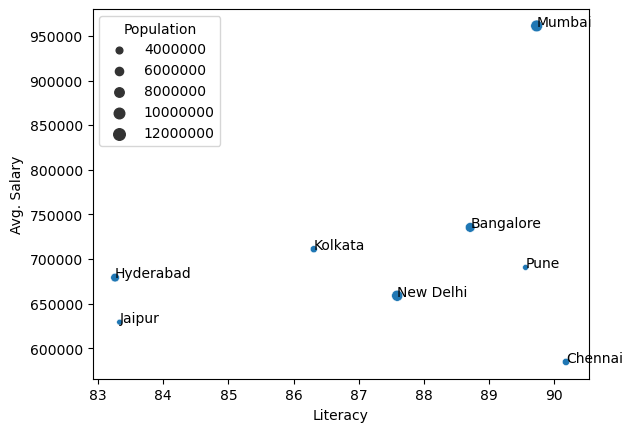

In [47]:
city = sps_fnd_loc_lit['City']
literacy = sps_fnd_loc_lit['Literacy']
salary = sps_fnd_loc_lit['Avg. Salary']

sns.scatterplot(x='Literacy', y='Avg. Salary', size="Population", data = sps_fnd_loc_lit)
for i, city in enumerate (city):
    plt.annotate(city, (literacy[i], salary[i]))

There seems to be a positive direct relationship between the two variables (higher levels of literacy correspond to higher salaries).
Mumbai's stats are outstanding, with one of the highest literacy rates, the highest average salaries, and one of the most numerous population.

While the relationship between Literacy and Salary seems to be directly proportional, there are some exceptions.
Chennai, which has the highest literacy rate, also has the lowest salaries.
It should be noted, however, that the cost of living in Chennai is severely lower than in Mumbai.

In [48]:
IFrame(src="https://www.numbeo.com/cost-of-living/compare_cities.jsp?country1=India&country2=India&city1=Chennai&city2=Mumbai", width='100%', height='400px')